# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    #print(df.head())
    station_locations_by_hash = df[df['hash'] == hashid]
    #print(station_locations_by_hash.head())
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()
    #print(lons)
    #print()
    #print(lats)
    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

For 5 the min temp of 2015 -155 is lower than -150
For 11 the min temp of 2015 -200 is lower than -183
For 34 the min temp of 2015 -238 is lower than -232
For 40 the max temp of 2015 83 is greater than 78
For 45 the min temp of 2015 -239 is lower than -217
For 46 the min temp of 2015 -260 is lower than -256
For 47 the min temp of 2015 -294 is lower than -222
For 48 the min temp of 2015 -272 is lower than -243
For 50 the min temp of 2015 -260 is lower than -188
For 51 the min temp of 2015 -343 is lower than -178
For 52 the min temp of 2015 -322 is lower than -178
For 54 the min temp of 2015 -267 is lower than -228
For 55 the min temp of 2015 -272 is lower than -211
For 56 the min temp of 2015 -217 is lower than -172
For 57 the min temp of 2015 -216 is lower than -200
For 58 the min temp of 2015 -288 is lower than -238
For 59 the min temp of 2015 -272 is lower than -271
For 64 the min temp of 2015 -221 is lower than -189
For 65 the min temp of 2015 -255 is lower than -178
For 66 the min 

<IPython.core.display.Javascript object>


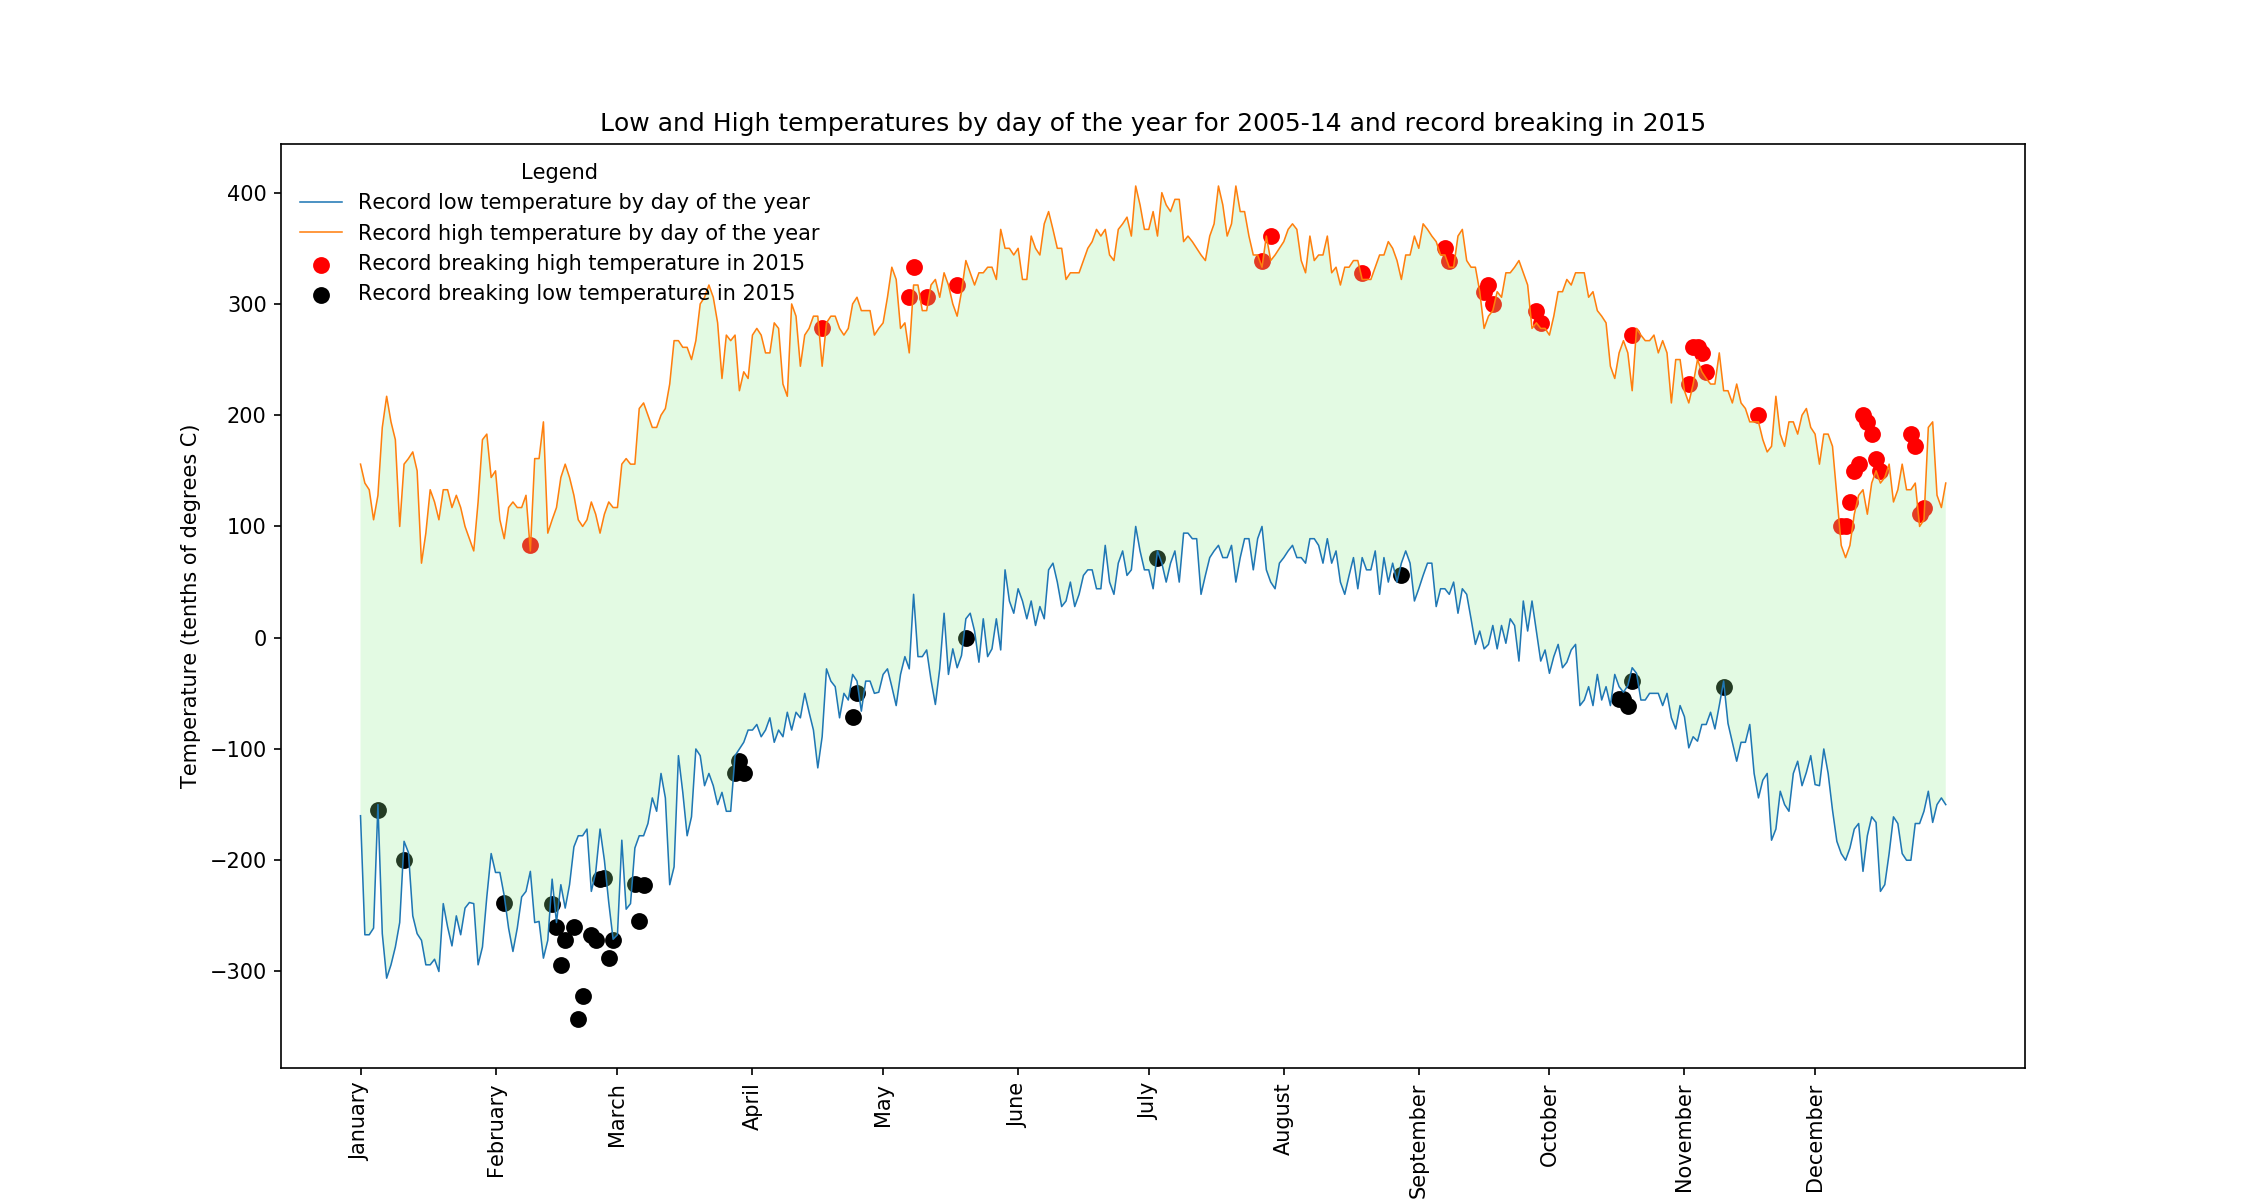

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, calendar

# Plot data for all 10 years
def assignment_2_v1():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    #print(df.head())
    df = df.drop("ID", axis=1)
    df = df[df['Date'] <= '2014-12-31']
    #df = df[df['Date'] <= '2005-12-31']
    #print(df[df['Date']=='2005-01-01'])

    record_high = {}
    record_low = {}

    def func(group):
        if group.iloc[0]['Date'].endswith('02-29'):
            print('Ignore {}'.format(group.iloc[0]['Date']))
            return None
        if group.iloc[0]['Element'] == 'TMAX':
            record_high[group.iloc[0]['Date']] = np.max(group['Data_Value'])
        else:
            record_low[group.iloc[0]['Date']] = np.min(group['Data_Value'])
        #print(group)
        return group
        
    df = df.groupby(["Date", "Element"]).apply(func)
    
    high = list(record_high.values())
    low = list(record_low.values())
    dates = list(record_high.keys())
    observation_dates = list(map(pd.to_datetime, dates)) # convert the map to a list to get rid of the error
    
    plt.figure(figsize=(14,8), dpi=80)
    plt.title('Plot of record low and high temperature by day of the year')
    plt.xlabel("Dates")
    plt.ylabel("Temperature (tenths of degrees C)")
    plt.plot(observation_dates, low, linestyle='solid', label='Record low temperature by day of the year', linewidth=0.75)
    plt.plot(observation_dates, high, linestyle='solid', label='Record high temperature by day of the year', linewidth=0.75)
    plt.xticks(observation_dates)
    #plt.tick_params(top=False, right=False, labelleft=False, labelbottom=True)
    
    # Rotate dates to vertical
    x = plt.gca().xaxis
    for item in x.get_ticklabels():
        item.set_rotation(90)

    # Set the legend
    plt.legend(loc=2, frameon=False, title='Legend')
    
    # fill the area between the linear data and exponential data
    plt.gca().fill_between(observation_dates, low, high, facecolor='green', alpha=0.25)
    
    '''
    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    '''
    
    # adjust the subplot so the text doesn't run off the image
    plt.subplots_adjust(bottom=0.25)

# Plot data for all days of the year
def assignment_2_v2():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df = df.drop("ID", axis=1)
    df_2015 = df[ (df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
    df = df[df['Date'] <= '2014-12-31']
    
    record_high = {}
    record_low = {}
    starting_day_of_month = set()
    def func(group):
        current_date = group.iloc[0]['Date']

        # Ignore leap year extra day
        if current_date.endswith('02-29'):
            return None

        datetime_date = datetime.datetime.strptime(current_date, '%Y-%m-%d')
        timetuple_date = datetime_date.timetuple()
        year_day = timetuple_date.tm_yday
        year = timetuple_date.tm_year
        month = timetuple_date.tm_mon

        # For leap year reduce the year_day by 1 for March onwards, to be consistent with non-leap years.
        # This fixes below inconsistency
        # datetime.datetime.strptime('2007-03-01', '%Y-%m-%d').timetuple().tm_yday # non-leap year
        # 60
        # datetime.datetime.strptime('2008-03-01', '%Y-%m-%d').timetuple().tm_yday # leap year
        # 61
        if calendar.isleap(year) and month >=3:
            year_day -= 1

        if(current_date.endswith('01')):
            starting_day_of_month.add(year_day)

        if group.iloc[0]['Element'] == 'TMAX':
            max_temperature = np.max(group['Data_Value'])
            if record_high.get(year_day):
                record_high[year_day] = max(record_high[year_day], max_temperature)
            else:
                record_high[year_day] = max_temperature
        else:
            min_temperature = np.min(group['Data_Value'])
            if record_low.get(year_day):
               record_low[year_day] = min(record_low[year_day], min_temperature)
            else:
               record_low[year_day] = min_temperature
        return group
    
    # Aggregate 2005-2014 data for line plot
    df = df.groupby(["Date", "Element"]).apply(func)
    high = list(record_high.values())
    low = list(record_low.values())
    dates = list(record_high.keys())
    
    record_breaking_high_2015 = {}
    record_breaking_low_2015 = {}
    def func2015(group):
        current_date = group.iloc[0]['Date']
        datetime_date = datetime.datetime.strptime(current_date, '%Y-%m-%d')
        timetuple_date = datetime_date.timetuple()
        year_day = timetuple_date.tm_yday
        
        if group.iloc[0]['Element'] == 'TMAX':
            max_temperature = np.max(group['Data_Value'])
            if max_temperature > record_high[year_day]:
                record_breaking_high_2015[year_day] = max_temperature
                print(f"For {year_day} the max temp of 2015 {max_temperature} is greater than {record_high[year_day]}")
        else:
            min_temperature = np.min(group['Data_Value'])
            if min_temperature < record_low[year_day]:
                record_breaking_low_2015[year_day] = min_temperature
                print(f"For {year_day} the min temp of 2015 {min_temperature} is lower than {record_low[year_day]}")
        return group
        
        
    # Aggregate 2015 data for scatter
    df_2015 = df_2015.groupby(["Date", "Element"]).apply(func2015)
    print(record_breaking_high_2015)
    print(record_breaking_low_2015)

    # Plot
    print("Start Plotting...")
    plt.figure(figsize=(15,8), dpi=75)
    plt.title('Low and High temperatures by day of the year for 2005-14 and record breaking in 2015')
    plt.xlabel("Day of the Year")
    plt.ylabel("Temperature (tenths of degrees C)")
    plt.plot(dates, low, linestyle='solid', label='Record low temperature by day of the year', linewidth=0.75)
    plt.plot(dates, high, linestyle='solid', label='Record high temperature by day of the year', linewidth=0.75)
    
    plt.scatter(list(record_breaking_high_2015.keys()), list(record_breaking_high_2015.values()), s=50, c='red', label='Record breaking high temperature in 2015')
    plt.scatter(list(record_breaking_low_2015.keys()), list(record_breaking_low_2015.values()), s=50, c='black', label='Record breaking low temperature in 2015')
    
    #plt.xticks(sorted(starting_day_of_month), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
    #plt.xticks(sorted(starting_day_of_month.keys()), sorted(starting_day_of_month.values()), rotation=90)
    plt.xticks(sorted(starting_day_of_month), calendar.month_name[1:13], rotation=90)

    # Set the legend
    plt.legend(loc=2, frameon=False, title='Legend')
    
    # fill the area between the linear data and exponential data
    plt.gca().fill_between(dates, low, high, facecolor='lightgreen', alpha=0.25)
    
#assignment_2_v1()
assignment_2_v2()

Start Plotting...


<IPython.core.display.Javascript object>


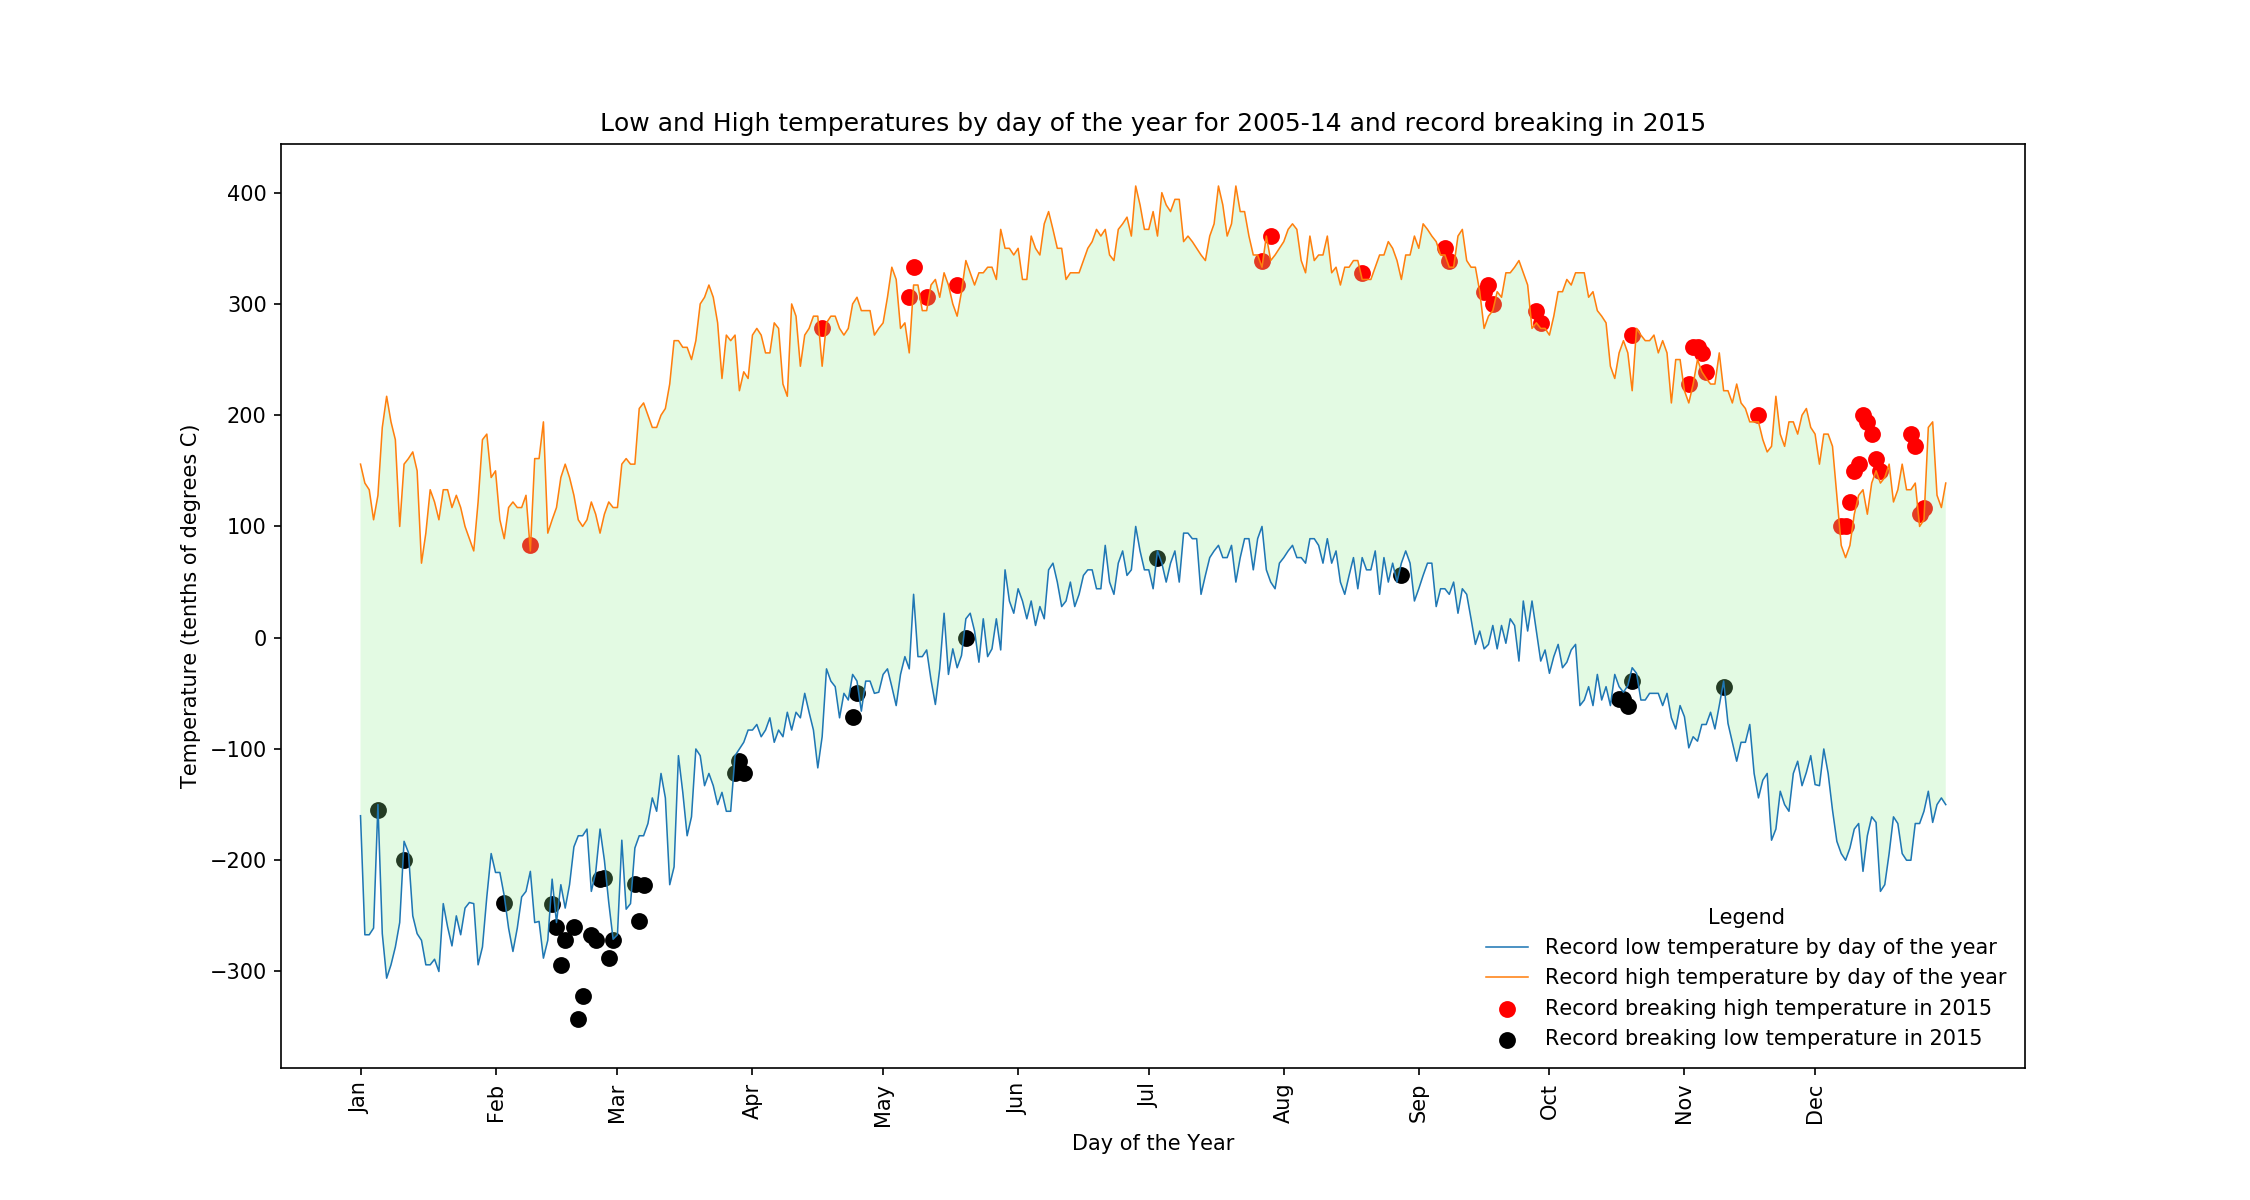

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, calendar

# Plot data for all days of the year
def assignment_2():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df = df.drop("ID", axis=1)
    df_2015 = df[ (df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
    df = df[df['Date'] <= '2014-12-31']
    
    # Aggregate 2005-2014 data for line plot
    record_high = {}
    record_low = {}
    starting_day_of_month = set()
    def func(group):
        current_date = group.iloc[0]['Date']

        # Ignore leap year extra day
        if current_date.endswith('02-29'):
            return None

        datetime_date = datetime.datetime.strptime(current_date, '%Y-%m-%d')
        timetuple_date = datetime_date.timetuple()
        year_day = timetuple_date.tm_yday
        year = timetuple_date.tm_year
        month = timetuple_date.tm_mon

        # For leap year reduce the year_day by 1 for March onwards, to be consistent with non-leap years.
        if calendar.isleap(year) and month >=3:
            year_day -= 1

        if(current_date.endswith('01')):
            starting_day_of_month.add(year_day)

        if group.iloc[0]['Element'] == 'TMAX':
            max_temperature = np.max(group['Data_Value'])
            if record_high.get(year_day):
                record_high[year_day] = max(record_high[year_day], max_temperature)
            else:
                record_high[year_day] = max_temperature
        else:
            min_temperature = np.min(group['Data_Value'])
            if record_low.get(year_day):
                record_low[year_day] = min(record_low[year_day], min_temperature)
            else:
                record_low[year_day] = min_temperature
        return group
    
    df = df.groupby(["Date", "Element"]).apply(func)
    high = list(record_high.values())
    low = list(record_low.values())
    dates = list(record_high.keys())
    #print(dates)
    
    # Aggregate 2015 data for scatter
    record_breaking_high_2015 = {}
    record_breaking_low_2015 = {}
    def func2015(group):
        current_date = group.iloc[0]['Date']
        datetime_date = datetime.datetime.strptime(current_date, '%Y-%m-%d')
        timetuple_date = datetime_date.timetuple()
        year_day = timetuple_date.tm_yday
        
        if group.iloc[0]['Element'] == 'TMAX':
            max_temperature = np.max(group['Data_Value'])
            if max_temperature > record_high[year_day]:
                record_breaking_high_2015[year_day] = max_temperature
                #print(f"For {year_day} the max temp of 2015 {max_temperature} is greater than {record_high[year_day]}")
        else:
            min_temperature = np.min(group['Data_Value'])
            if min_temperature < record_low[year_day]:
                record_breaking_low_2015[year_day] = min_temperature
                #print(f"For {year_day} the min temp of 2015 {min_temperature} is lower than {record_low[year_day]}")
        return group
        
    df_2015 = df_2015.groupby(["Date", "Element"]).apply(func2015)

    # Plot
    print("Start Plotting...")
    plt.figure(figsize=(15,8), dpi=75)
    plt.title('Low and High temperatures by day of the year for 2005-14 and record breaking in 2015')
    plt.xlabel("Day of the Year")
    plt.ylabel("Temperature (tenths of degrees C)")
    plt.plot(dates, low, linestyle='solid', label='Record low temperature by day of the year', linewidth=0.75)
    plt.plot(dates, high, linestyle='solid', label='Record high temperature by day of the year', linewidth=0.75)
    
    plt.scatter(list(record_breaking_high_2015.keys()), list(record_breaking_high_2015.values()), s=50, c='red', label='Record breaking high temperature in 2015')
    plt.scatter(list(record_breaking_low_2015.keys()), list(record_breaking_low_2015.values()), s=50, c='black', label='Record breaking low temperature in 2015')
    
    plt.xticks(sorted(starting_day_of_month), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

    # Set the legend
    plt.legend(loc=4, frameon=False, title='Legend')
    
    # fill the area between the linear data and exponential data
    plt.gca().fill_between(dates, low, high, facecolor='lightgreen', alpha=0.25)
    
assignment_2()